In [1]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
unneeded_data = ['Place_of_isolation','Patient_In','Patient_out']
catigorical_data=['Blood_Group','CONTROL_blood_group','Risk_Factor']
labels = ['Severeity','Outcome']
droped_col = unneeded_data+catigorical_data+labels

In [3]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)



df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

blood_types = pd.get_dummies(df['Blood_Group']).columns

#     #All 
# blood_group_columns = pd.get_dummies(df[['Blood_Group','CONTROL_blood_group']]).columns
# df = pd.concat([df, pd.get_dummies(df[['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']])], axis=1)
# df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)


    #NO Blood control group
blood_group_columns = pd.get_dummies(df['Blood_Group']).columns

temp = []
for g in blood_group_columns:
    temp.append("Blood_Group_"+g)
blood_group_columns = temp
df = df.drop("CONTROL_blood_group",axis=1)



df = pd.concat([df, pd.get_dummies(df[['Blood_Group','Risk_Factor','Infection_type']])], axis=1)
df = df.drop(['Blood_Group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)




columns = df.columns



# getting rid of blank values
print("before",df.shape)
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)


df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))#strings to numeric
all_columns = df.columns
# df = df.reset_index()

print("after",df.shape)


df_no_blood_data = copy.deepcopy(df.drop(blood_group_columns,axis=1))



before (5668, 49)
after (5641, 47)


In [4]:
df

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.columns

Index(['Age', ' Incubation period (days)', 'Fever ', 'Chills', 'Cough',
       'Dyspnea', 'Anosmia_Ageusia', 'Loss_of_appetite', 'Asthenia',
       'Headache', 'Muscle_ache', 'Cyanosis', 'Rhinorrhea', 'Sore_throat',
       'Diarrhea', 'Nausea_vomiting', 'is_Male', 'Blood_Group_A+',
       'Blood_Group_A-', 'Blood_Group_AB+', 'Blood_Group_AB-',
       'Blood_Group_B+', 'Blood_Group_B-', 'Blood_Group_O+', 'Blood_Group_O-',
       'Risk_Factor_AP', 'Risk_Factor_ARF', 'Risk_Factor_AT', 'Risk_Factor_CA',
       'Risk_Factor_CKD', 'Risk_Factor_CLD', 'Risk_Factor_COPD',
       'Risk_Factor_COPDDM', 'Risk_Factor_COPDHT', 'Risk_Factor_DM',
       'Risk_Factor_DMARF', 'Risk_Factor_DMAT', 'Risk_Factor_DMCKD',
       'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_HT ',
       'Risk_Factor_NONE', 'Risk_Factor_RF', 'Infection_type_Asymptomatic',
       'Infection_type_Asymtomatic', 'Infection_type_Symptomatic',
       'Infection_type_Symtomatic'],
      dtype='object')

In [6]:
blood_group_columns

['Blood_Group_A+',
 'Blood_Group_A-',
 'Blood_Group_AB+',
 'Blood_Group_AB-',
 'Blood_Group_B+',
 'Blood_Group_B-',
 'Blood_Group_O+',
 'Blood_Group_O-']

In [7]:
def get_Auc(model,X,y,bloodType,pos_label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    GO = True
    count = 2
    while(not (len(y_train.unique()) > 1 and pos_label in y_train.unique()) 
          or not ( len(y_test.unique()) > 1 and pos_label in y_train.unique())):
        print((len(y_train.unique()) > 1 and pos_label in y_train.unique())  )
        if(count > 10):
            print(bloodType," Not possiable for ",pos_label)
            GO = False
            break;

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=count)
        count = count + 1



    if(GO):
        # Training ONLY on the training set to get AUC:
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        prob = model.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label=pos_label)
        AUC = metrics.auc(fpr, tpr)
        return GO,AUC,fpr,tpr
    else:
        return GO,None,None,None

In [8]:
def compare_Blood_or_noBlood(model,y,blacklist_features):
    
    X_blood = df[[a for a in df.columns if a not in blacklist_features]]
    
    all_blood_types = {}
    
    classes=label_Severeity.unique()
    print(classes)
    
    for class_index in range(4):
        for btype in blood_group_columns:
            print(len(X_blood[X_blood[btype]==1]))
            print(len(y[X_blood[btype]==1]))
            
            GO,AUC_WB,fpt_WB,tpr_WB = get_Auc(copy.deepcopy(model)
                                              ,X_blood[X_blood[btype]==1],
                                              y[X_blood[btype]==1],
                                              btype,classes[class_index])

            if(not GO):
                continue;

            print(class_index," Area Under Curve With Blood ",btype,": \t",AUC_WB)
            all_blood_types[btype] = (AUC_WB,fpt_WB,tpr_WB)

            lbl = btype + classes[class_index]
            plt.plot(fpt_WB, tpr_WB,label=classes[class_index])
            
        plt.figure()

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.figlegend()
    plt.show()
    
#    return all_blood_types
    
    

In [9]:
for btype in blood_group_columns:
    print(f'{btype}\tSize:{len(df[df[btype]== 1])}')

Blood_Group_A+	Size:1489
Blood_Group_A-	Size:77
Blood_Group_AB+	Size:511
Blood_Group_AB-	Size:133
Blood_Group_B+	Size:1644
Blood_Group_B-	Size:227
Blood_Group_O+	Size:1485
Blood_Group_O-	Size:75


In [10]:
df[df["Blood_Group_O-"] == 1]

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
40,72.0,7,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
47,56.0,10,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
131,17.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
139,24.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
157,27.0,14,1,0,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,18.0,14,1,0,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5574,41.0,14,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5576,26.0,14,1,0,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5583,50.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [11]:
label_Severeity

0       Moderate
1           Mild
2         Severe
3       Moderate
4       Moderate
          ...   
5663    Moderate
5664      Severe
5665      Severe
5666      Severe
5667      Severe
Name: Severeity, Length: 5641, dtype: object

In [12]:
blacklist = []

Logistic Regression
['Moderate' 'Mild' 'Severe' 'Critical']
1489
1489
0  Area Under Curve With Blood  Blood_Group_A+ : 	 0.5005156765676568
77
77
0  Area Under Curve With Blood  Blood_Group_A- : 	 0.4
511
511
0  Area Under Curve With Blood  Blood_Group_AB+ : 	 0.4324381926683717
133
133
0  Area Under Curve With Blood  Blood_Group_AB- : 	 0.6086956521739131
1644
1644
0  Area Under Curve With Blood  Blood_Group_B+ : 	 0.40433385443807535
227
227
0  Area Under Curve With Blood  Blood_Group_B- : 	 0.40460526315789475
1485
1485
0  Area Under Curve With Blood  Blood_Group_O+ : 	 0.4514845423936333
75
75
0  Area Under Curve With Blood  Blood_Group_O- : 	 0.4772727272727273
1489
1489
1  Area Under Curve With Blood  Blood_Group_A+ : 	 0.5934023141967067
77
77
1  Area Under Curve With Blood  Blood_Group_A- : 	 0.5999999999999999
511
511
1  Area Under Curve With Blood  Blood_Group_AB+ : 	 0.6137764084507042
133
133
1  Area Under Curve With Blood  Blood_Group_AB- : 	 0.18055555555555552
1644
1644


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


2  Area Under Curve With Blood  Blood_Group_AB+ : 	 nan
133
133
False
2  Area Under Curve With Blood  Blood_Group_AB- : 	 nan
1644
1644
2  Area Under Curve With Blood  Blood_Group_B+ : 	 0.1118012422360248
227
227
2  Area Under Curve With Blood  Blood_Group_B- : 	 nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


1485
1485
2  Area Under Curve With Blood  Blood_Group_O+ : 	 0.02203389830508473
75
75
False
False
False
False
False
False
False
False
False
False
Blood_Group_O-  Not possiable for  Severe
1489
1489
3  Area Under Curve With Blood  Blood_Group_A+ : 	 0.013559322033898313
77
77
3  Area Under Curve With Blood  Blood_Group_A- : 	 nan
511
511


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


3  Area Under Curve With Blood  Blood_Group_AB+ : 	 0.004950495049504955
133
133
False
False
False
False
False
False
False
False
False
False
Blood_Group_AB-  Not possiable for  Critical
1644
1644
3  Area Under Curve With Blood  Blood_Group_B+ : 	 0.010000000000000009
227
227


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


3  Area Under Curve With Blood  Blood_Group_B- : 	 nan
1485
1485
3  Area Under Curve With Blood  Blood_Group_O+ : 	 0.003424657534246589
75
75


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3  Area Under Curve With Blood  Blood_Group_O- : 	 0.1428571428571429


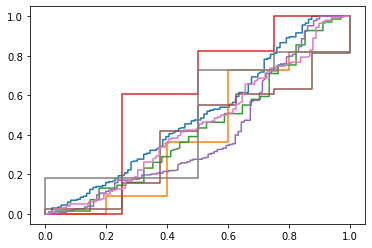

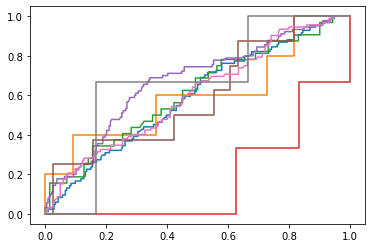

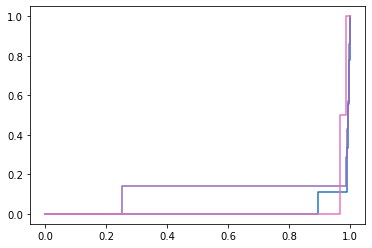

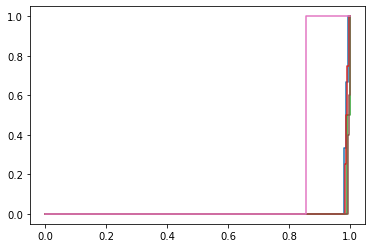

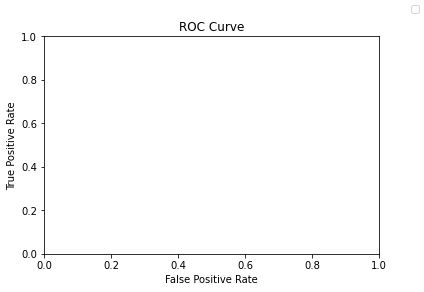

In [13]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severeity,blacklist)

In [14]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severeity,blacklist)

In [ ]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severeity,blacklist)

In [ ]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severeity,blacklist)

In [ ]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severeity,blacklist)

In [ ]:
#without the features from First Itteration of Boruta
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE']

In [ ]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severeity,blacklist)

In [ ]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severeity,blacklist)

In [ ]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severeity,blacklist)

In [ ]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severeity,blacklist)

In [ ]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severeity,blacklist)

In [ ]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE'
,'Sore_throat', 'Diarrhea', 'CONTROL_blood_group_B+', 'Risk_Factor_AP']

In [ ]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severeity,blacklist)

In [ ]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severeity,blacklist)

In [ ]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severeity,blacklist)

In [ ]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severeity,blacklist)

In [ ]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severeity,blacklist)

In [ ]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE'
,'Sore_throat', 'Diarrhea', 'CONTROL_blood_group_B+', 'Risk_Factor_AP','CONTROL_blood_group_AB+', 'Risk_Factor_CA', 'Headache', 'Risk_Factor_ARF', 'Risk_Factor_CKD', 'Risk_Factor_COPDDM', 'CONTROL_blood_group_O+', 'Cough']

In [ ]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severeity,blacklist)

In [ ]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severeity,blacklist)

In [ ]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severeity,blacklist)

In [ ]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severeity,blacklist)

In [ ]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severeity,blacklist)